<a href="https://colab.research.google.com/github/lazarovps/Data-Science/blob/main/Red_wine_quality_(classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Modelo de Machine Learning que prevê a qualidade de vinhos feito um especialista**



Para construção desse case hipotético, eu utilizei uma base de dados derivada de um estudo das propriedades físico-químicas de alguns vinhos da região do Minho, em Portugal. (dataset disponível em: https://archive.ics.uci.edu/ml/datasets/wine+quality ). Esse estudo possui 2 datasets, um de vinhos brancos e outro de vinhos vermelhos, eu estou utilizando o de vinhos vermelhos.

O dataset estudado possui aproximadamente 1600 vinhos, com 12 propriedades físico-químicas de cada um e uma nota para cada vinho, (a nota considerada no estudo foi a mediana da nota de pelo menos 3 especialistas), meu objetivo é de através da análise dessas 12 propriedades, conseguir prever qual seria a avaliação dos especialistas.

##Importação das bibliotecas necessárias

In [ ]:
from google.colab import drive 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

import csv
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


#configurando o diretório de trabalho
drive.mount('/content/drive')
%cd /content/drive/My Drive/Python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Python


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


##Exploração do dataset

In [ ]:
base = pd.read_csv('winequality-red.csv')
base.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Verificando quantas linhas há na base de dados
base.shape

(1599, 12)

In [ ]:
#A base de dados 1599 linhas e 12 coluns, que são entendidas como observações e variáveis, respectivamente. para verificar quais são, podemos visualizar as 5 primeiras linhas da base de dados
base.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


*Descrição das variáveis (não confio tanto no meu inglês assim para traduzi-las)*:



**fixed acidity:** most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

**volatile acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

**citric acid:** found in small quantities, citric acid can add 'freshness' and flavor to wines

**residual sugar:** the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

**chlorides:** the amount of salt in the wine

**free sulfur dioxide:** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

**total sulfur dioxide:** amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

**density:** the density of water is close to that of water depending on the percent alcohol and sugar content

**pH:** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

**sulphates:** a wine additive which can contribute to sulfur dioxide gas (S02) levels,wich acts as an antimicrobial and antioxidant

**alcohol:** the percent alcohol content of the wine

**quality:** (score between 0 and 10)


---



In [ ]:
#Algumas informações básicas das nossas variáveis:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB



A principal informação que pretendo extrair aqui é o tipo das variáveis e se há variáveis com alguma observação nula. Em relação ao tipo das variáveis, quase todas são numéricas, o que já evita uma possível transformação, caso fossem categóricas.

O segundo ponto e que mais nos auxilia aqui, é que todas as variáveis possuem 1599 linhas "non-null" o que indica que não temos valores nulos.

Serão utilizadas todas as variáveis, exceto "quality", como variáveis explicativas, ou seja, com base nessas variáveis pretende-se prever qual seria a avaliação de determinado vinho se fosse feita por um especialista. A variável explicada ( ou também conhecida como a variável alvo) será "quality".

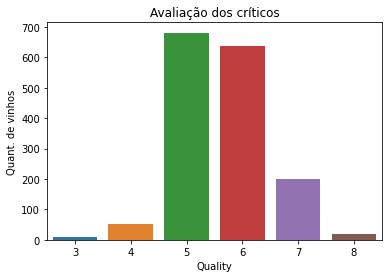

In [ ]:
#É interessante analisarmos graficamente como está a distribuição da nossa variável alvo
ax = sns.countplot(x = 'quality', data = base)
plt.ylabel('Quant. de vinhos')
plt.xlabel('Quality')
plt.title('Avaliação dos críticos')
plt.show()


Vemos que nenhum dos quase 1600 vinhos foram avaliados com 9 ou 10, a maior parte ficou entre 5 e 7. Ao invés de tentarmos prever a nota de um vinho podemos querer saber apenas se um vinho seria avaliado como "bom" ou "ruim" pelos críticos, então para isso, iremos fazer uma transformação da variável alvo, onde:

Um vinho com "quality" abaixo de 7 será considerado "ruim", caso "quality" seja maior ou igual a 7, o vinho será considerado "bom". Onde o primeiro argumento da função (np.where) seria a condição, nesse caso que quality seja menor que 7, o segundo argumento é o valor atribuído à linha caso a condição seja satisfeita (a 'quality' dos vinhos ruins será substituída por 0) e o terceiro é o valor atribuído à linha caso a condição não seja satisfeita (a 'quality' dos vinhos bons será substituída por 1). Logo em seguida. verificamos a distribuição da variável alvo após a transformação.





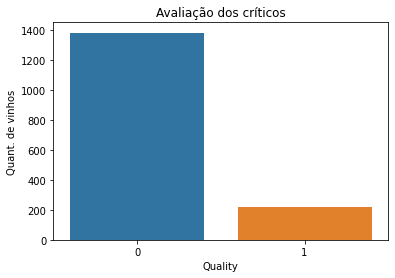

In [ ]:

base['qualidade'] = np.where(base['quality']< 7, 0, 1)
ax = sns.countplot(x = 'qualidade', data = base)
plt.ylabel('Quant. de vinhos')
plt.xlabel('Quality')
plt.title('Avaliação dos críticos')
plt.show()

In [ ]:
base.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


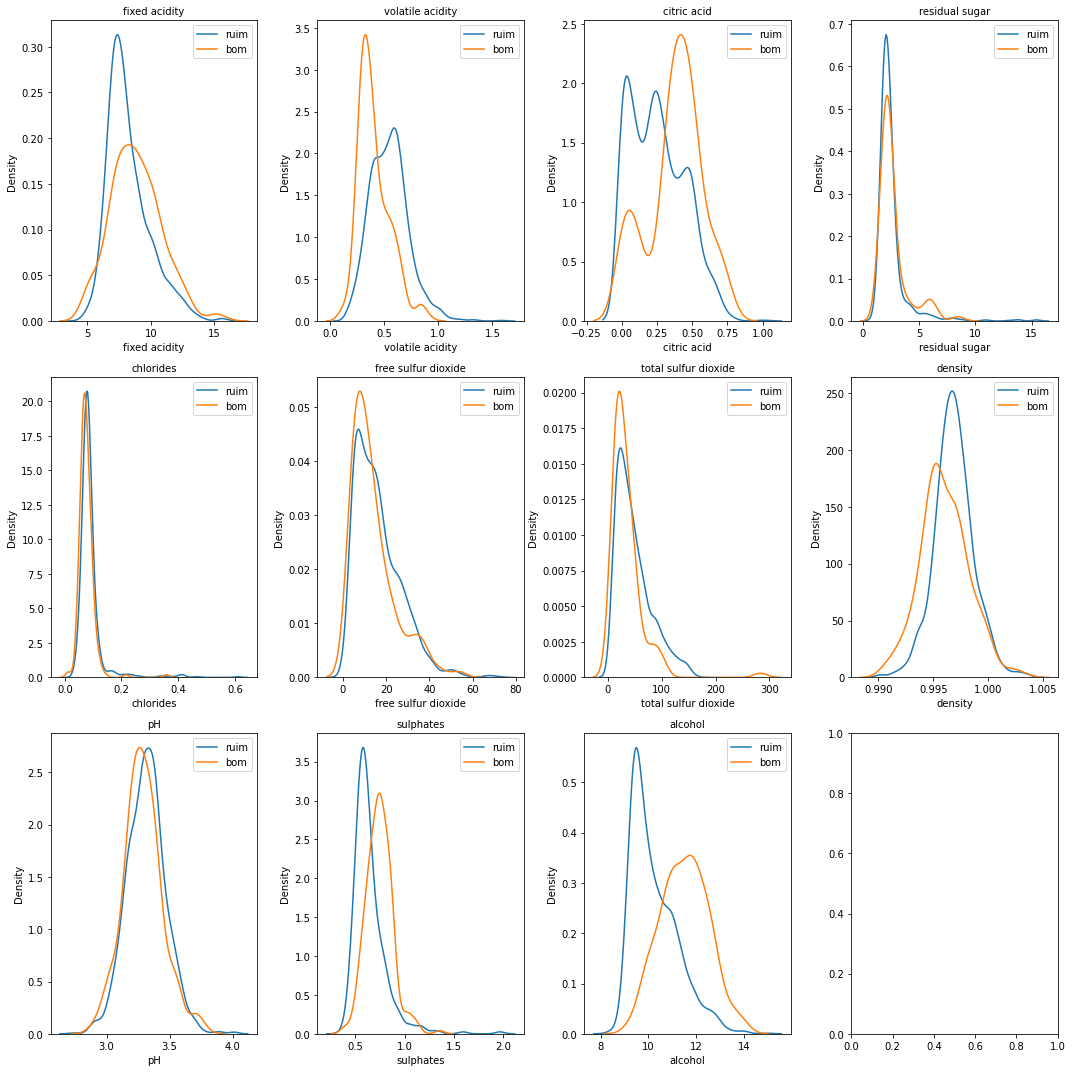

In [ ]:
colunas = base.drop(['quality', 'qualidade'], axis=1).columns
base_ruim = base[base.qualidade == 0]
base_bom = base[base.qualidade == 1]

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15,15))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in colunas:
    idx += 1
    plt.subplot(3, 4, idx)
    sns.kdeplot(base_ruim[col])
    sns.kdeplot(base_bom[col])
    plt.title(col, fontsize=10)
    plt.legend(['ruim','bom'])
plt.tight_layout()

A primeiro momento percebemos que as variáveis que mais divergem de um vinho ruim e um bom são fixed acidity, volatile acidity, citric acid e principalmente alcohol. Esperamos que essas sejam as features com maior importância no modelo.

Para ver a correlação entre as variáveis, é interessante plotar um heatmap.

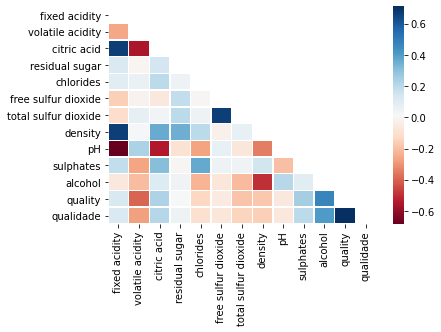

In [ ]:
mask = np.zeros_like(base.corr())
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(base.corr(),linewidths=.5, mask = mask, cmap = 'RdBu')

Olhando primeiramente para a relação entre as variáveis preditoras:

*   fixed acidity tem correlação significativa com citric acid (positiva), density(positiva) e com pH (negativa)
*   volatile possui correlação positiva com citric acid.
*   citric acid possui relação positiva com pH
*   total sulfur dioxide possui relação positiva com free sulfur dioxide
*   Alcohol possui relação negativa com density

Quando olhamos em relação à variável alvo, temos apenas alcohol com uma correlação (positiva) significante.


Após ter uma noção de como está a base de dados, começamos à prepará-la para o modelo.

Primeiro, dividimos-a em variáveis independentes (X) e dependentes(y).



In [ ]:
X = base.drop(['quality','qualidade'], axis = 1)
y = base['qualidade']

In [ ]:
#verificando as 5 primeiras linhas da base de dados com as variáveis previsoras
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
#O mesmo para a variável alvo (que se tornou variável binária)
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: qualidade, dtype: int64

In [ ]:
y.value_counts()

0    1382
1     217
Name: qualidade, dtype: int64

Os vinhos classificados como ruins representam 13,6 % dos dados, com isso, o nosso modelo tenderia a classificar bem mais vinhos como ruins do que como bons, por não ter tido exemplos o suficiente da outra classe, então, é aconselhável o balanceamento das classes.

In [ ]:
balanceador = RandomUnderSampler(random_state = 1, sampling_strategy= 0.75)
x_bal, y_bal = balanceador.fit_resample(X,y)

#O argumento "random_state" é uma forma de "escolher" a aleatoriedade, é uma forma de possibilitar a replicabilidade 
#dos resultados.

In [ ]:
#Verificando as linhas e colunas da nossa nova base de dados
x_bal.shape, y_bal.shape

((506, 11), (506,))

In [ ]:
#Verificando a distribuição da nova variável alvo
pd.DataFrame(y_bal).value_counts()

0    289
1    217
dtype: int64

Agora, nossa base de dados possui apenas as informações de 506 vinhos (descartamos mais de 1000 !), podemos ver que a base está perfeitamente razoavelmente balanceada, essa diferença provavelmente não nos causará problemas mas nos deixa com um pouco mais de informação.

Para podermos simular as previsões, deveremos dividir nossa base de dados em "base de treino" e "base de teste".Na base de treino, nosso modelo aprenderá os padrões das avaliações, podendo aprender a avaliar de maneira semelhante à um crítico, se o algoritmo aprender corretamente, ele poderá prever a classificação de um vinho como bom ou ruim apenas olhando suas características (sem precisar provar rsrs),que são as variáveis previsoras (X).

Para verificarmos o poder de previsão do algoritmo, iremos simular que a base de teste é na verdade os vinhos que ainda não conhecemos a avaliação, e então poderemos prever e comparar com as reais avaliações.

Na função "train_test_split" passaremos os argumentos X e y, escolheremos também o tamanho da nossa base de dados "teste", nesse caso será de 0.3 (ou 30 %) do total dos dados e por fim "escolhemos" a aleatoriedade com qual os dados serão divididos entre treino e teste

In [ ]:
#Realizando a divisão da nossa base de dados entre treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_bal, y_bal, test_size = 0.3, random_state = 1)

Com isso, geramos 4 objetos:
x_treino e y_treino será onde o modelo vai "aprender" quais são os aspectos que influenciam na opinião de um crítico sobre determinado vinho, será com base nas informações de x_teste que o modelo fará a previsão e y_teste será a verdadeira avaliação, aqui é que iremos comparar o quão boa foi a previsão do modelo

##Modelo de regressão logística e Random Forest (sem tuning)

In [ ]:
#Após a divisão entre treino e teste, iremos criar o modelo ou algoritmo que irá tentar captar os padrões nas avaliações
#Importando a biblioteca necessária
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver= 'liblinear')

#O algoritmo Logistic Regression (Regressão Logística) é comumente utilizado para prever a probabilide de um evento ocorrer,
#Nesse caso, iremos utiliza-lo para classificar um evento, que no nosso caso, é se o vinho será ruim (0) ou bom (1)

#"Ensinando" o algoritmo os padrões das avaliações dos críticos
logreg.fit(x_treino,y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Após ensinarmos os padrões das avaliações, podemos tentar prever a classificação de novos vinhos
y_previsto = logreg.predict(x_teste)

Criamos um objeto chamado 'y_previsto' nele estão as previsões do algoritmo para os vinhos da base "x_treino", agora podemos comparar essas previsões com as reais classificações dadas pelos críticos à esses(com a base de dados "y_teste") e então saberemos o quão próximo está nosso algoritmo da avaliação de um crítico,para isso, devemos ter alguma forma de mensurar essa proximidade, que nesse caso será pela métrica conhecida como acurácia. 
A acurácia é entendida como a quantidade de previsões corretas dividida pela quantidade total de previsões, por exemplo, se fizermos 100 previsões e acertamos 70, nossa acurácia será de 70/100, ou, 70%, então, nosso objetivo nesse caso é ter uma boa capacidade de previsão, que será entendida como obter uma acurácia o mais próxima possível de 1.

In [ ]:
#importando uma biblioteca para verificar a acurácia do algoritmo
from sklearn.metrics import accuracy_score
accuracy_score(y_teste, y_previsto)

0.8157894736842105

O desempenho do nosso modelo não teve um resultado tão satisfatório, então, testemos outro tipo de método: Random Forest.

Sem realizar qualquer tipo de tuning de hiperparâmetros, temos:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_treino,y_treino)
y_previsto2 = rfc.predict(x_teste)
accuracy_score(y_teste,y_previsto2)

0.868421052631579

Com o resultado, vemos que o nosso algoritmo acertou 86,8% das previsões que ele fez, o que pode ser considerado um valor muito bom, considerando que usamos um dos mais simples algoritmo de aprendizado de máquina.

##Prevendo classificações

Podemos criar exemplos e ver qual seria a previsão do algoritmo, para isso, seria necessário ter todas as caracterísitcas que nosso algoritmo utilizou para aprender a classificar.(tecnicamente não precisaria de todas, mas ignoremos isso).

In [ ]:
#Consideremos o exemplo (valores atribuídos aleatoriamente):
vinhos = pd.DataFrame(np.array([[8,0.35,0.4,3,0.09,13,29,0.99230,3.3,0.7,11.7],
                            [9.5,0.44,0.23,4,0.16,19,45,0.98700,4.1,0.54,9.2]]), 
                      columns = X.columns, index = ['quintas_do_morgado','vinho_quentinho'])

vinhos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quintas_do_morgado,8.0,0.35,0.40,3.0,0.09,13.0,29.0,0.9923,3.3,0.70,11.7
vinho_quentinho,9.5,0.44,0.23,4.0,0.16,19.0,45.0,0.9870,4.1,0.54,9.2


In [ ]:
#Agora podemos prever qual seria a classificação dos críticos para cada um dos vinhos que acabamos de criar
rfc.predict(vinhos)

array([1, 0])

O resultado mostra que o primeiro vinho da base de dados, no nosso caso o vinho 'quintas_do_morgado' seria classificado como bom (valor = 1) pelos críticos, enquanto que o 'vinho_quentinho' seria tido com ruim (valor = 0), lembrando que nem sempre a acurácia é uma boa métrica e que há possibilidades de ajuste dos hiperparâmetros.